# 예제 2 : 데이터 증강
- 회전, 상하이동, 좌우이동, 뒤집기를 반영한 이미지 데이터 증강

In [1]:
pip install scipy

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
    --------------------------------------- 0.8/38.6 MB 4.8 MB/s eta 0:00:08
   - -------------------------------------- 1.8/38.6 MB 4.8 MB/s eta 0:00:08
   -- ------------------------------------- 2.9/38.6 MB 4.8 MB/s eta 0:00:08
   ---- ----------------------------------- 3.9/38.6 MB 4.8 MB/s eta 0:00:08
   ----- ---------------------------------- 5.0/38.6 MB 4.8 MB/s eta 0:00:08
   ------ --------------------------------- 6.0/38.6 MB 4.8 MB/s eta 0:00:07
   ------- -------------------------------- 6.8/38.6 MB 4.8 MB/s eta 0:00:07
   -------- ------------------------------- 7.9/38.6 MB 4.8 MB/s eta 0:00:07
   --------- ------------------------------ 8.9/38.6 MB 4.8 MB/s eta 0:00:07
   ---------- ----------------------------- 10.0/38.6 MB 4.8 MB/s eta 0:00:06
   ----------- ---------------------------- 11.0/38.6 MB 4.8 MB/s eta 0:00:06
   ------------ --------------------------- 12.1/38.6 MB 4.8 MB/s eta 0:00:06
   

## 라이브러리 불러오기

In [2]:
import tensorflow.keras.datasets as ds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import scipy

## 데이터 전처리

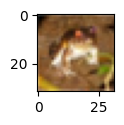

In [10]:
(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
x_train=x_train.astype('float32'); x_train/=255
x_train=x_train[0:15,]; y_train=y_train[0:15,]	# 앞 15개에 대해서만 증대 적용
class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck']
plt.figure(figsize=(1,1))
plt.imshow(x_train[0])

## 원본 학습 이미지 시각화

/var/folders/h7/_sd40pm94t9bd_zgyv2h19mr0000gn/T/ipykernel_53505/343259566.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


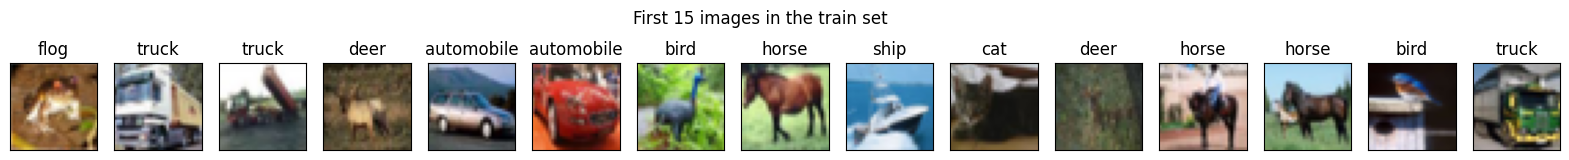

In [18]:
plt.figure(figsize=(20,2))
plt.suptitle("First 15 images in the train set")

for i in range(15):
    plt.subplot(1,15,i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(y_train[i])])

plt.show()

## 데이터 증강 제너레이터 설정

In [19]:
batch_siz=4			# 한 번에 생성하는 양(미니 배치)
generator=ImageDataGenerator(rotation_range=20.0,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
gen=generator.flow(x_train,y_train,batch_size=batch_siz)

## 데이터 증강 결과 확인

/var/folders/h7/_sd40pm94t9bd_zgyv2h19mr0000gn/T/ipykernel_53505/2992896004.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(label[i])])


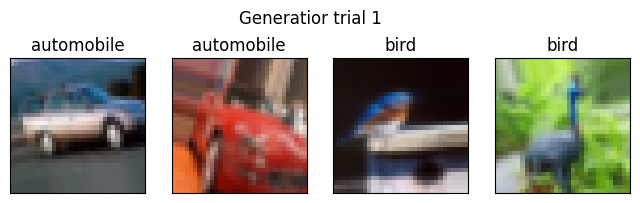

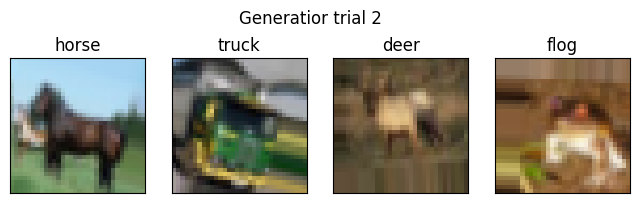

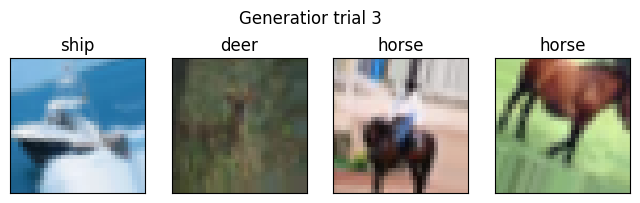

In [22]:
for a in range(3):
    # .next() 메서드 대신 next() 함수로 수정
    img,label = next(gen)    # 미니 배치만큼 생성

    plt.figure(figsize=(8,2.4))
    plt.suptitle("Generatior trial "+str(a+1))
    for i in range(batch_siz):
        plt.subplot(1,batch_siz,i+1)
        plt.imshow(img[i])
        plt.xticks([]); plt.yticks([])
        plt.title(class_names[int(label[i])])
    plt.show()